# Análisis DataSet `Penguins_Size.csv`

In [1]:
## Autor: Carlos Esteves Flores
## No. Cuenta: 314286637
## Carrera: Física
## Curso: Introducción a las Ciencias de Datos con Python
## Fecha: 28 de enero de 2024

# Se importan las bibliotecas que podríamos necesitar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

In [2]:
# Se lee el DataSet a analizar.
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


El DataSet leído anteriormente, parece tratarse de un conteo de 344 ejemplares de pingüinos, de 3 especies diferentes, en los cuales se consideran 7 parámetros, que son:
1. `species`: especie del pingüino
2. `island`: isla de origen
3. `culmen_length_mm`: longitud de la cresta del pico en milímetros
4. `culmen_depth_mm`: profundidad de la cresta del pico en milímetros
5. `flipper_length_mm`: longitud de la aleta en milímetros
6. `body_mass_g`: masa en gramos
7. `sex`: sexo del especímen

In [3]:
# Se enlistan los tipos de datos de todas las columnas del DataFrame
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
# Se enlistan los valores NaN existentes en el DataFrame, por columna
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Se observa que existen 18 valores NaN en el DataFrame, de los cuales, 10 son datos de tipo objeto, relacionados con el sexo de cada pingüino, mientras que el resto son datos de tipo flotante, que se relacionan directamente con parámetros númericos de los ejemplares.

In [5]:
# Vamos a trabajar con una copia del DataFrame, para hacer la limpieza del mismo de acuerdo a nuestras necesidades
# y tener lista la base de datos.
df_copy = df.copy()

Para hacer un análisis estadístico, vamos a concentrarnos en los valores numéricos de la base de datos, por lo cual, las columnas `species`, `island`y `sex` no serán relevantes por el momento.

In [6]:
df_numeric = df_copy.drop(columns = ['species', 'island', 'sex'], axis = 1)

In [7]:
df_numeric

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [8]:
# El ciclo se encargará de rellenar en cada columna, los valores NaN con la media de los datos existentes en cada columna.
for i in list(df_numeric.columns):
    df_numeric[i] = df_numeric[i].fillna(df_numeric[i].mean())

In [9]:
df_numeric.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [10]:
df_numeric.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


- La longitud promedio del culmen es de 43.92 mm.
- La profundidad promedio del culmen es de 17.15 mm.
- La longitud promedio de la aleta es de 200.91 mm.
- La masa promedio es de 4201.75 gramos (aproximadamente 4.2 kg).

In [11]:
# La matriz de correlación de los datos.
df_numeric.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: title={'center': 'Numeric Data Heatmap - Penguins Size'}>

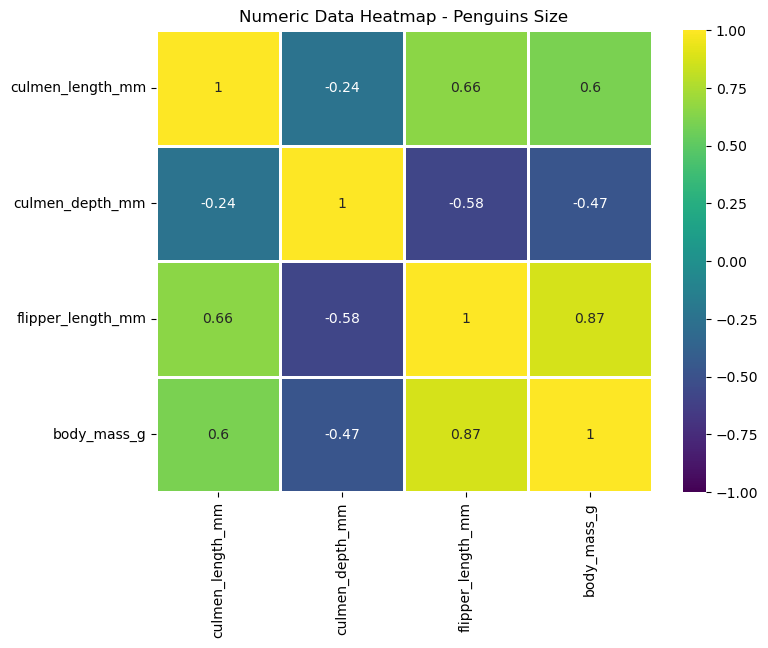

In [12]:
plt.figure(figsize = (8,6))
ax = plt.axes()
ax.set_title("Numeric Data Heatmap - Penguins Size")
sns.heatmap(df_numeric.corr(), annot = True, linewidths = 1, vmin = -1.0, vmax = 1.0, cmap = "viridis")

Del mapa de calor, se puede resaltar que hay una alta correlación entre las variables `flipper_length_mm` y `body_mass_g`, con una $R = 0.87$, lo cual nos quiere decir que hay una relación cercana a lo lineal entre éstas. Esto quiere decir que mientras más larga es la aleta/cola de un pingüino, mayor es su masa. Es el par con correlación positiva más fuerte.

Para el par `culmen_length_mm` vs `flipper_length_mm`, se tiene una correlación moderada positiva ($R = 0.66$), lo cual nos podría dar indicios de que si el culmen aumenta su longitud, también lo hace la aleta, aunque no es una relación que necesariamente sea lineal.

Por otro lado, en el par `culmen_depth_mm` vs `flipper_length_mm`, se tiene una correlación moderada negativa ($R = -0.58$), que indicaría que si el culmen aumenta su profundidad, la aleta decrece en tamaño.

A continuación, se mostrará la matriz de gráficos de dispersión para comprobar el comportamiento de la relación entre los pares de variables antes mencionados.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


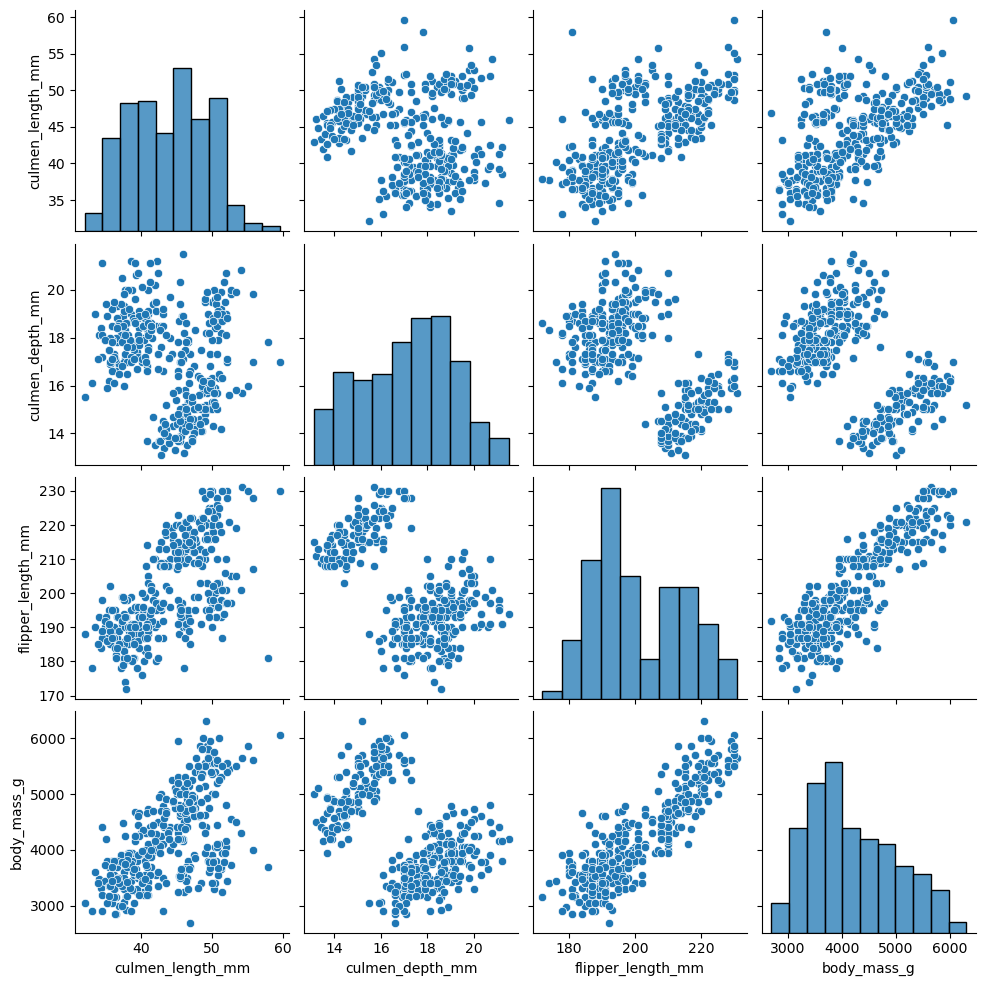

In [13]:
sns.pairplot(df_numeric)

Con los gráficos anteriores, se puede comprobar el comportamiento de los pares mencionados, además de que, la relación entre la longitud y profundidad del culmen es poco clara, pues la dispersión de los datos es bastante grande, por lo cual, no es concluyente.

## Regresión Lineal: Modelo predictivo para `flipper_length_mm` vs `body_mass_g`

Para hacer una regresión lineal, vamos a considerar el par con mayor correlación.

In [14]:
# Definimos nuestra regresión lineal
lr = LinearRegression()

In [15]:
# Simplificamos nuestros conjuntos de datos
serie_1 = df_numeric['flipper_length_mm']
serie_2 = df_numeric['body_mass_g']

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

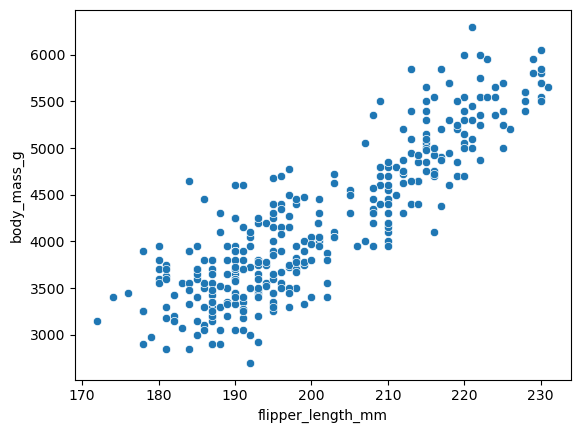

In [16]:
sns.scatterplot(x = serie_1, y = serie_2)

In [17]:
# Correlación entre las variables
serie_1.corr(serie_2)

0.8712017673060114

In [18]:
# Entrenamiento del modelo, para la predicción.
lr.fit(serie_1.to_frame(), serie_2)

LinearRegression()

In [19]:
y_predict1 = lr.predict(serie_1.to_frame())

En color naranja, se grafican los puntos obtenidos gracias a la predicción hecha por nuestro modelo.
En color azul, se tienen los datos provenientes de DataFrame.

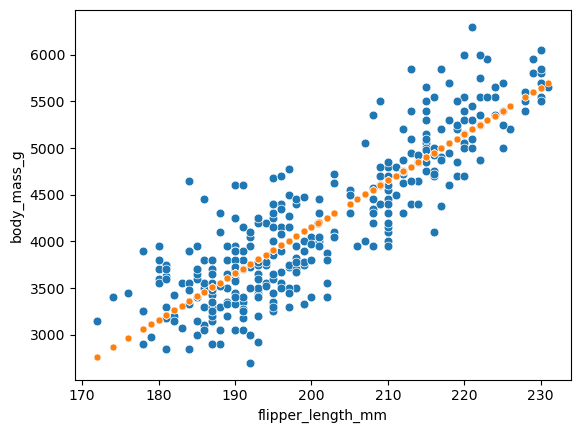

In [20]:
sns.scatterplot(x = serie_1, y = serie_2, s = 40);
sns.scatterplot(x = serie_1, y = y_predict1, s = 25);

En el gráfico siguiente se muestra, en color verde, el margen de error entre nuestra predicción y los datos.

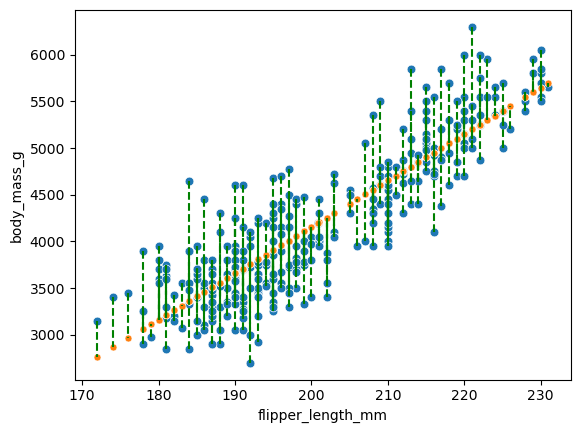

In [21]:
sns.scatterplot(x = serie_1, y = serie_2, s = 40);
sns.scatterplot(x = serie_1, y = y_predict1, s = 25);

for i in range(len(serie_1)):
    plt.plot([serie_1[i], serie_1[i]], [serie_2[i], y_predict1[i]], 'g--')

Ahora, obtenemos la ecuación que describe nuestro modelo entrenado:

In [22]:
intercept1 = lr.intercept_
coefficient1 = lr.coef_[0]

Con lo anterior, se obtiene que la función que describe nuestro modelo es la siguiente:


In [23]:
print(f'y = {coefficient1}* x + {intercept1}')

y = 49.6855664061001* x + -5780.831358077066


Comprobemos nuestra función predictiva:

In [24]:
print(f'Valor de x: {serie_1[150]}')
print(f'Valor de y: {serie_2[150]}')
print(f'Valor de y predecido por nuestro modelo: {y_predict1[150]}')
print(f'Valor de y cuantificado directamente usando la funcion: {coefficient1 * serie_1[150] + intercept1}')

Valor de x: 187.0
Valor de y: 3700.0
Valor de y predecido por nuestro modelo: 3510.369559863653
Valor de y cuantificado directamente usando la funcion: 3510.369559863653


Para saber qué tan efectiva es la predicción, calculemos el coeficiente de determinación:

In [25]:
print(f'R2: {np.power(serie_1.corr(serie_2), 2)}')

R2: 0.7589925193571176


O bien, directamente del modelo entrenado:

In [26]:
print(f'R2: {lr.score(serie_1.to_frame(), serie_2)}')

R2: 0.7589925193571176


In [27]:
print(r2_score(y_predict1, serie_2))

0.6824639578173702


Comparando los resultados para el método `score()` y la función `r2_score()`, se puede concluir que el modelo entrenado es lo suficientemente efectivo para predecir el comportamiento entre estas dos variables y que, además, hay una fuerte correlación entre ellas.

Tomando en cuenta los valores obtenidos para el coeficiente de determinación, con el método `score()` y la función `r2_score()`, se puede observar que el modelo predictivo no es lo suficientemente efectivo para explicar la correlación entre estas dos variables, por lo que habría que verificar si existe algún tipo de ruido en los datos que provoca esa baja efectividad. Observando el gráfico de dispersión para este par de variables, existen algunos pares ordenados que están alejados significativamente del resto de datos. Probablemente, omitir esa data nos ayude a hacer que el modelo sea más efectivo.

## K-Means `culmen_length_mm` vs `culmen_depth_mm`

In [28]:
serie_3 = df_numeric['culmen_length_mm']
serie_4 = df_numeric['culmen_depth_mm']

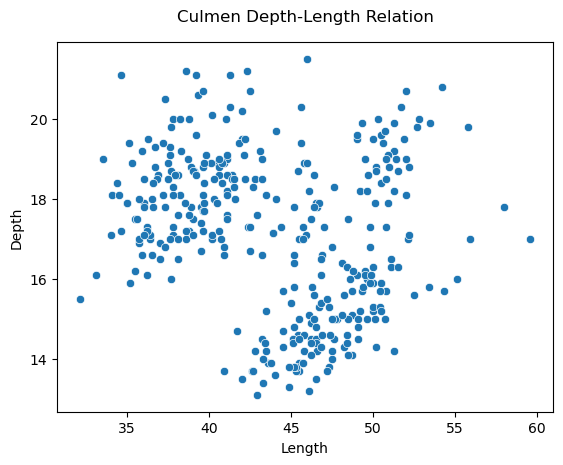

In [29]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Culmen Depth-Length Relation', pad=15)
ax.set_xlabel('Length')
ax.set_ylabel('Depth')

sns.scatterplot(x = serie_3, y = serie_4, ax=ax);

In [30]:
datos = np.column_stack((serie_3, serie_4))
k_means = KMeans(n_clusters = 4, max_iter=10000)

In [31]:
k_means.fit(datos)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=10000, n_clusters=4)

In [32]:
centers = k_means.cluster_centers_

centers

array([[51.09102564, 17.51538462],
       [36.70512821, 17.91794872],
       [41.07875   , 18.56      ],
       [46.06244314, 15.2907624 ]])

C:\Users\Carlos Stvs\AppData\Local\Temp\ipykernel_13252\4111667724.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = serie_3, y = serie_4, ax=ax, palette='rainbow')


<Axes: title={'center': 'Culmen Depth-Length Relation'}, xlabel='Length', ylabel='Depth'>

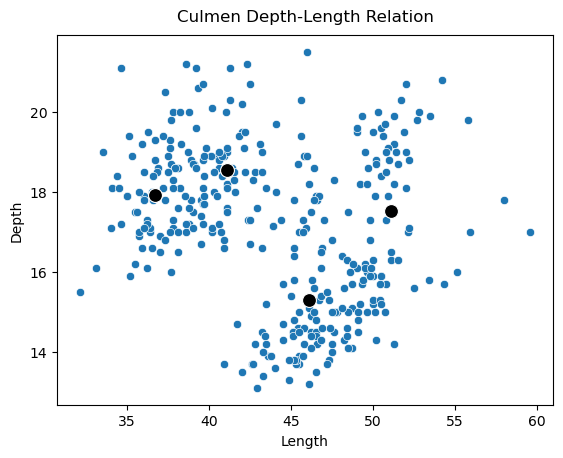

In [33]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Culmen Depth-Length Relation', pad=10)
ax.set_xlabel('Length')
ax.set_ylabel('Depth')

sns.scatterplot(x = serie_3, y = serie_4, ax=ax, palette='rainbow')
sns.scatterplot(x = centers[:,0], y = centers[:,1], ax=ax, s=100, color='black')

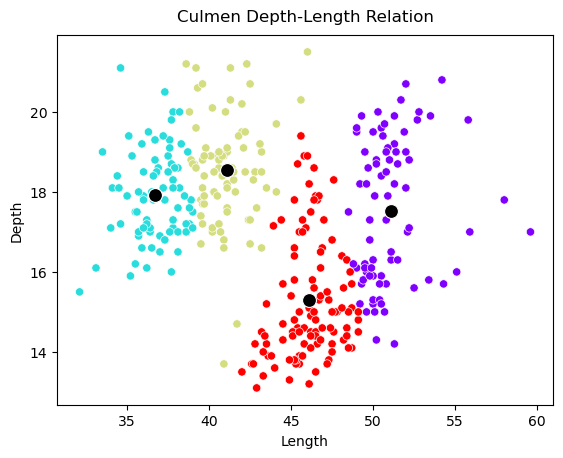

In [34]:
cl = k_means.predict(datos)
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Culmen Depth-Length Relation', pad=10)
ax.set_xlabel('Length')
ax.set_ylabel('Depth')

sns.scatterplot(x = serie_3, y = serie_4, ax=ax, hue = cl, palette ='rainbow')
sns.scatterplot(x = centers[:,0], y = centers[:,1], ax=ax, s=100, color='black')
ax.get_legend().remove()

El gráfico anterior, divide los ejemplares de pingüinos que tienen características similares en 4 grupos, de acuerdo a cómo se relaciona la profundidad y longitud de sus culmen.

## Regresión Logística: Penguins `sex` parameter

In [35]:
# Definimos otro dataset, a partir de la copia.
dfs = df_copy.drop(columns = ['species', 'island'], axis = 1)
dfs

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [36]:
# Limpiamos un poco el nuevo DataFrame
dfs = dfs.dropna(axis = 0, how = 'any', subset = 'sex')
dfs

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


Comprobamos que, en efecto, ya no hay valores `NaN`:

In [37]:
dfs.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [38]:
dfs['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

Notemos que no sólo había valores `NaN`, sino que también cadenas `"."`, por lo cual, debemos eliminar esas filas.

In [39]:
dfs = dfs.drop(index=dfs.loc[dfs['sex'] == '.'].index)
dfs

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [40]:
dfs['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

Ahora sí podemos cambiar los valores del parámetro `sex`, donde `MALE = 0` y `FEMALE = 0`.

In [41]:
dfs['sex'] = dfs['sex'].apply(lambda x: 0 if x == 'MALE' else 1)
dfs

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,1


El modelo de regresión logística nos ayudará a clasificar a los ejemplares como machos o hembras.

In [42]:
X = dfs.drop(columns=['sex'])
y = dfs['sex']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Predicción de prueba
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

Calculamos la exactitud del modelo, para verificar en qué porcentaje éste clasifica correctamente los ejemplares de pingüino.

In [46]:
logreg.score(X_test, y_test)

0.78